<a href="https://colab.research.google.com/github/Tapishi/Pattern-Separation-using-Logistic-Regressions/blob/main/With_Graphs(1d).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
## dataset
n=1# dimensions
m=100 # number of data points
beta_true = np.array([ 0.5] ) # original value of beta chosen
print(beta_true.shape)
a=np.random.random(1) # bias
X = (np.random.random((m, n))-0.5 )*10
Y = np.round(sigmoid(X@beta_true+a  + np.random.randn(m)*0.5)) # labels

X_test = (np.random.random((2*m, n))-0.5 )*10 # generating test data
Y_test = np.round(sigmoid(X_test @ beta_true +a+ np.random.randn(2*m)*0.5)) # labels of test data

(1,)


In [ ]:
def error(scores, labels):
  scores[scores > 0] = 1
  scores[scores <= 0] = 0

  return np.sum(np.abs(scores - labels)) / float(np.size(labels))

In [ ]:
beta=cp.Variable((n))
b=cp.Variable(1)
print((X@beta).shape)
log_likelihood = cp.sum(cp.multiply(Y, X @ beta+b) - cp.logistic(X @ beta+b))
problem = cp.Problem(cp.Maximize(log_likelihood/m ))
problem.solve()
beta=beta.value
b=b.value
train_error_lm = error( (X @ beta+b), Y)
test_error_lm = error( (X_test @ beta+b), Y_test)

(100,)


In [ ]:
print(train_error_lm)
print(test_error_lm)

0.06
0.085


In [ ]:
one=[]
zero=[]
for i in range(0,len(X)):
  if Y[i]==1:
    one.append(X[i])
  else:
    zero.append(X[i])

In [ ]:
one=np.array(one)
zero=np.array(zero)

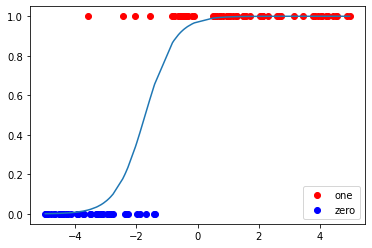

In [ ]:
plt.scatter(one, [1]*len(one), c="red", label="one")
plt.scatter(zero, [0]*len(zero), c="blue", label="zero")
z=np.sort(X.ravel())
y=[]
for i in range(0,len(z)):
  if sigmoid(z[i]*beta+b)>=0.5:
    y.append(1)
  else:
    y.append(0)
plt.plot(z,sigmoid(z*beta+b))
plt.legend()
plt.show()

[2.0941939]


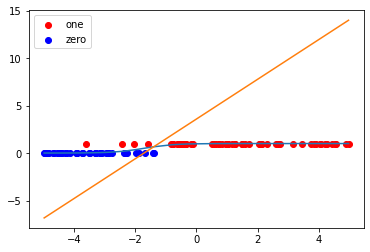

In [ ]:
plt.scatter(one, [1]*len(one), c="red", label="one")
plt.scatter(zero, [0]*len(zero), c="blue", label="zero")
print(beta)
z=np.sort(X.ravel())
plt.plot(z,sigmoid(z*beta+b))
plt.plot(z,(z*beta+b))
plt.legend()
plt.show()

TEST POINTS

In [ ]:
onet=[]
zerot=[]
for i in range(0,len(X_test)):
  if Y_test[i]==1:
    onet.append(X_test[i])
  else:
    zerot.append(X_test[i])
onet=np.array(onet)
zerot=np.array(zerot)

[2.0941939]


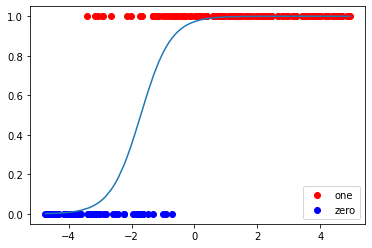

In [ ]:
plt.scatter(onet, [1]*len(onet), c="red", label="one")
plt.scatter(zerot, [0]*len(zerot), c="blue", label="zero")
print(beta)
zt=np.sort(X_test.ravel())
yt=[]
for i in range(0,len(zt)):
  if sigmoid(zt[i]*beta+b)>=0.5:
    yt.append(1)
  else:
    yt.append(0)
plt.plot(zt,sigmoid(zt*beta+b))
plt.legend()
plt.show()

[2.0941939]


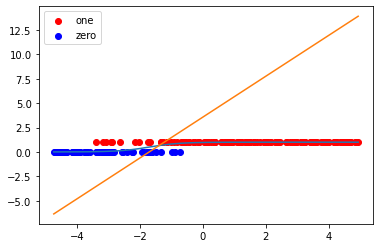

In [ ]:
plt.scatter(onet, [1]*len(onet), c="red", label="one")
plt.scatter(zerot, [0]*len(zerot), c="blue", label="zero")
print(beta)
zt=np.sort(X_test.ravel())
plt.plot(zt,sigmoid(zt*beta+b))
plt.plot(zt,(zt*beta+b))

plt.legend()
plt.show()

In [ ]:
alpha=cp.Variable((n))
a=cp.Variable(1)
constraints=[cp.norm(a)<=1]
t=cp.Variable(1)
for i in range(0,n):
  constraints+=[a.T@one[i]-b >=t]
for i in range(0,n):
  constraints+=[a.T@zero[i]-b <=-t]

obj=cp.Maximize(t)
prob = cp.Problem(obj,constraints)
prob.solve(verbose=True)
alpha=alpha.value
a=a.value
print(alpha)

None


As we can see above, we cannot find a plane that perfectly separates the two sets of points. Hence, we try to use logistic regression and linear discrimination via logistic modelling.